# Beija Richardson 5/1/25



# Sorting algorithms

Most of the time, we will used "canned" sorting algorithms when we do data science.

But, it is important to be aware of some common algorithms,  so we will look at a couple sorting algorithms

We also need to understand how to characterize the run time or efficiency of an algorithm



Bubble sort is from: 

https://www.geeksforgeeks.org/python-program-for-bubble-sort/    


# Bubble Sort

This was invented by Edward Friend in 1956.

It is not the best available sort, but it is taught in most intro to programming courses, so we need to see it.



In [8]:
def bubble_sort(arr):

    nouter=len(arr)
    
    # Outer loop to iterate through the list n times, starting at the 2nd to last item in the array, ending at zero, moving in steps of -1
    for n in range(nouter - 1, 0, -1):
             
        # Inner loop to compare adjacent elements  
        # start at zero and go up to 
        
        for i in range(n):
            if arr[i] > arr[i + 1]:
                # Swap elements if they are in the wrong order
                arr[i], arr[i + 1] = arr[i + 1], arr[i]

# the outer loop starts with n=length-1
# the inner loop then moves the largest item it finds to the end of the list,  like a bubble floating to the top
# the outer loop then runs at n=length-2, and the second largest item is moved to the end
       

# Sample list to be sorted
arr = [39, 12, 18, 85, 72, 10, 2, 18]
print("Unsorted list is:")
print(arr)

bubble_sort(arr)

print("Sorted list is:")
print(arr)


Unsorted list is:
[39, 12, 18, 85, 72, 10, 2, 18]
Sorted list is:
[2, 10, 12, 18, 18, 39, 72, 85]


# *Question/Action *

Only one simple change on one line of the function is needed to make it sort in descending form

Copy and paste, then edit to bubble_sort_descending,   show that this works.

Dont' alter the loop directions...

In [22]:
def bubble_sort(arr, descending=False):
    nouter = len(arr)
    for n in range(nouter - 1, 0, -1):
        for i in range(n):
            if (arr[i] > arr[i + 1] and not descending) or (arr[i] < arr[i + 1] and descending):
                arr[i], arr[i + 1] = arr[i + 1], arr[i]

arr= [39, 12, 18, 85, 72, 10, 2, 18]
print("Unsorted list is:")
print(arr)

bubble_sort(arr)

bubble_sort(arr, descending=True) 
print("Sorted list descending:")
print(arr)

Unsorted list is:
[39, 12, 18, 85, 72, 10, 2, 18]
Sorted list descending:
[85, 72, 39, 18, 18, 12, 10, 2]


# Time

## How fast is our code?  How do we describe this?

Let's use %timeit to time how long  a bubble sort takes at some different array lengths

The number of repetitions of the loop is n*(n-1), so the run time should be proportional to $n^2$

The speed of the algorithm is said to be order of $n^2$,   written as *O*($n^2$)

In Computer science, we really want to know the order of the algorithms we use



In [25]:
import random
random_numbers = [random.random() for _ in range(50)]

In [27]:
#50 values in random numbers

%timeit bubble_sort(random_numbers)


113 μs ± 5.29 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [28]:
random_numbers = [random.random() for _ in range(500)]
%timeit bubble_sort(random_numbers)

12 ms ± 180 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [29]:
random_numbers = [random.random() for _ in range(2000)]
%timeit bubble_sort(random_numbers)

250 ms ± 14.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [31]:
random_numbers = [random.random() for _ in range(5000)]
%timeit bubble_sort(random_numbers)

1.51 s ± 17.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


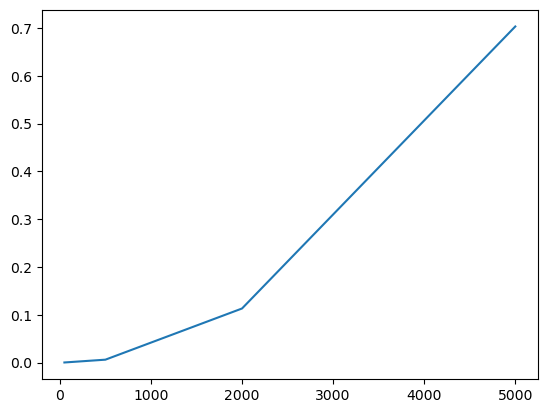

In [32]:
import matplotlib.pyplot as plt
import numpy as np

time=[60.2e-6, 5.92e-3,113e-3,703e-3]
n=[50,500,2000,5000]      

plt.plot(n,time)

# A better sorting algorithm

The mergesort is a faster, more efficient way to sort.

In [40]:
import math   # needed for the floor() operation

def merge(left, right):                         #left and right are two lists, each is in order internally
    result = []                                 # result will hold the merged list
    i ,j = 0, 0                                 # "cursor" positions in the two lists
    while i < len(left) and j < len(right):    # repeat until we run out of items in the lists
        if left[i] <= right[j]:                # figure out which is smaller, the next item in left or right, put the smaller into the results
            result.append(left[i])             # increase i or j to the next time in the list
            i += 1
        else:
            result.append(right[j])
            j += 1
    result += left[i:]                         # add the remaining items in each list to results,  only one will have remaining values
    result += right[j:]
    return result                              # we have now merged left and right into a merged list

def mergesort(list):
    if len(list) < 2:
        return list
    middle = math.floor(len(list) / 2)
    left = mergesort(list[:middle])              # note the recursion,   it will keep splitting the left list till only 1 element remains,
                                                    # then merger the 1 element listing,  ordering them as it goes,  it will do the same 
                                                    # to the right list,
    right = mergesort(list[middle:])
    return merge(left, right)

In [42]:
mergesort(arr)

[2, 10, 12, 18, 18, 39, 72, 85]

# How does the Mergesort work?

Note this implementation is recursive.

If the length of a list is 1, we just return it

Other wise

1.) find the midpoint
2.) Mergesort the left half
3.) Mergestor the right half
3.) "Merge" the two sorted halves of the two lists,  in the values in the two lists are combined back into a single list, always by 
adding the smallest value in either the two lists into the single merged list.

# How fast should mergesort be?

This can get complicated, but it appears that mergesort is faster than

O($n log n + n + O(log n)$)

the lead term here is nlog(n),   which is less than $n^2$ 

mergesort is a bit unpredictable in it's timing, it can vary greatly with the amount of order already present

In [46]:
random_numbers = [random.random() for _ in range(500)]
%timeit mergesort(random_numbers)

919 μs ± 21.4 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [47]:
random_numbers = [random.random() for _ in range(5000)]
%timeit mergesort(random_numbers)

12.7 ms ± 308 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# *Question/Action*

Generate a series of tests of the time to run a mergesort over the same range of n values we used for the bubblesort
and set up lists of n_merge and t_merger.

Plot the time vs n for the bubblesort and the mergesort on a single graph.

In [50]:
import random
random_numbers = [random.random() for _ in range(50)]

%timeit mergesort(random_numbers)

65.8 μs ± 1.3 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [52]:
random_numbers = [random.random() for _ in range(500)]
%timeit mergesort(random_numbers)

934 μs ± 24.7 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [54]:
random_numbers = [random.random() for _ in range(2000)]
%timeit mergesort(random_numbers)

4.68 ms ± 238 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [56]:
random_numbers = [random.random() for _ in range(5000)]
%timeit mergesort(random_numbers)

12.6 ms ± 284 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


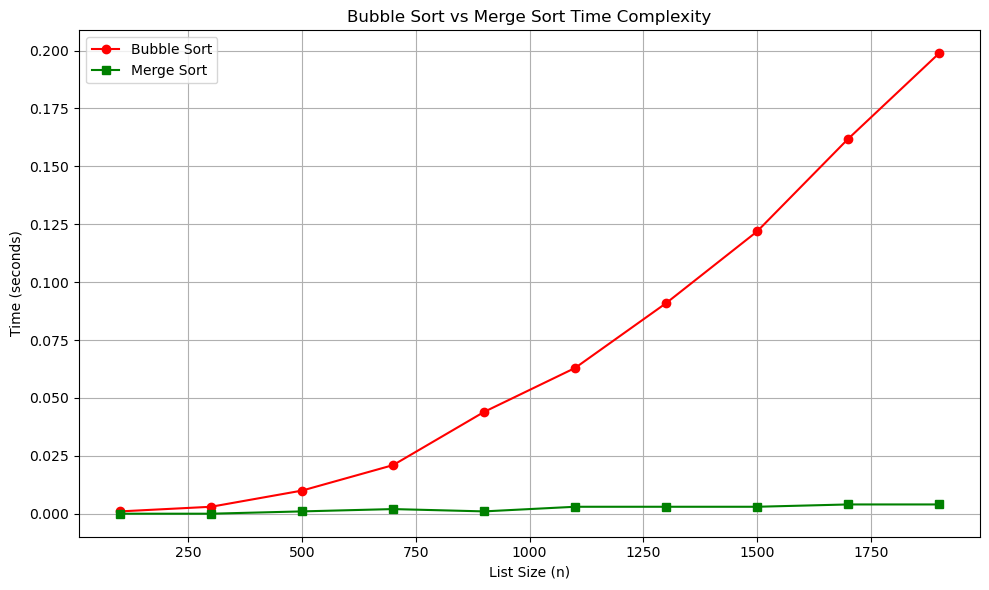

In [71]:
import time
import matplotlib.pyplot as plt

def bubble_sort(arr):
    nouter = len(arr)
    for n in range(nouter - 1, 0, -1):
        for i in range(n):
            if arr[i] > arr[i + 1]:
                arr[i], arr[i + 1] = arr[i + 1], arr[i]


def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        L = arr[:mid]
        R = arr[mid:]

        merge_sort(L)
        merge_sort(R)

        i = j = k = 0
        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1

        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1

        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1

n_values = list(range(100, 2100, 200))

n_bubble = []
t_bubble = []

n_merge = []
t_merger = []

for n in n_values:
    data = [random.randint(0, 10000) for _ in range(n)]

    # Bubble Sort Timing
    bubble_data = data[:]
    start = time.time()
    bubble_sort(bubble_data)
    end = time.time()
    n_bubble.append(n)
    t_bubble.append(end - start)

    # Merge Sort Timing
    merge_data = data[:]
    start = time.time()
    merge_sort(merge_data)
    end = time.time()
    n_merge.append(n)
    t_merger.append(end - start)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(n_bubble, t_bubble, label='Bubble Sort', marker='o', color='red')
plt.plot(n_merge, t_merger, label='Merge Sort', marker='s', color='green')
plt.xlabel('List Size (n)')
plt.ylabel('Time (seconds)')
plt.title('Bubble Sort vs Merge Sort Time Complexity')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Question: with the n values why cant I put 50,500,2000?